In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('train.csv')
df

,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0
...,...,...,...,...,...,...
404285,404285,433578,379845,How many keywords are there in the Racket prog...,How many keywords are there in PERL Programmin...,0
404286,404286,18840,155606,Do you believe there is life after death?,Is it true that there is life after death?,1
404287,404287,537928,537929,What is one coin?,What's this coin?,0
404288,404288,537930,537931,What is the approx annual cost of living while...,I am having little hairfall problem but I want...,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404290 entries, 0 to 404289
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            404290 non-null  int64 
 1   qid1          404290 non-null  int64 
 2   qid2          404290 non-null  int64 
 3   question1     404289 non-null  object
 4   question2     404288 non-null  object
 5   is_duplicate  404290 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 18.5+ MB


In [5]:
df.isna().sum()

id              0
qid1            0
qid2            0
question1       1
question2       2
is_duplicate    0
dtype: int64

In [6]:
df.duplicated().sum()

0

In [7]:
df.is_duplicate.value_counts()

0    255027
1    149263
Name: is_duplicate, dtype: int64

<AxesSubplot:ylabel='is_duplicate'>

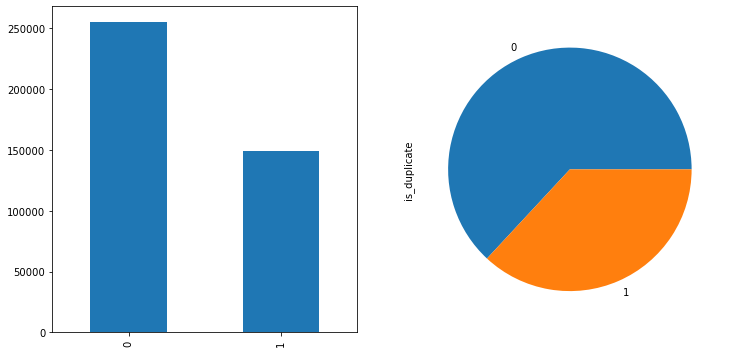

In [8]:
fig,axes=plt.subplots(1,2,figsize=(12,6))
df.is_duplicate.value_counts().plot(ax=axes[0],kind="bar")
df.is_duplicate.value_counts().plot(ax=axes[1],kind="pie")

In [9]:
df.qid1.dtypes

dtype('int64')

In [10]:
len(df.qid1.tolist() + df.qid2.tolist())

808580

In [11]:
qid = pd.Series(df.qid1.tolist() + df.qid2.tolist())
qid

0              1
1              3
2              5
3              7
4              9
           ...  
808575    379845
808576    155606
808577    537929
808578    537931
808579    537933
Length: 808580, dtype: int64

In [12]:
len(qid)

808580

In [13]:
np.unique(qid).shape

(537933,)

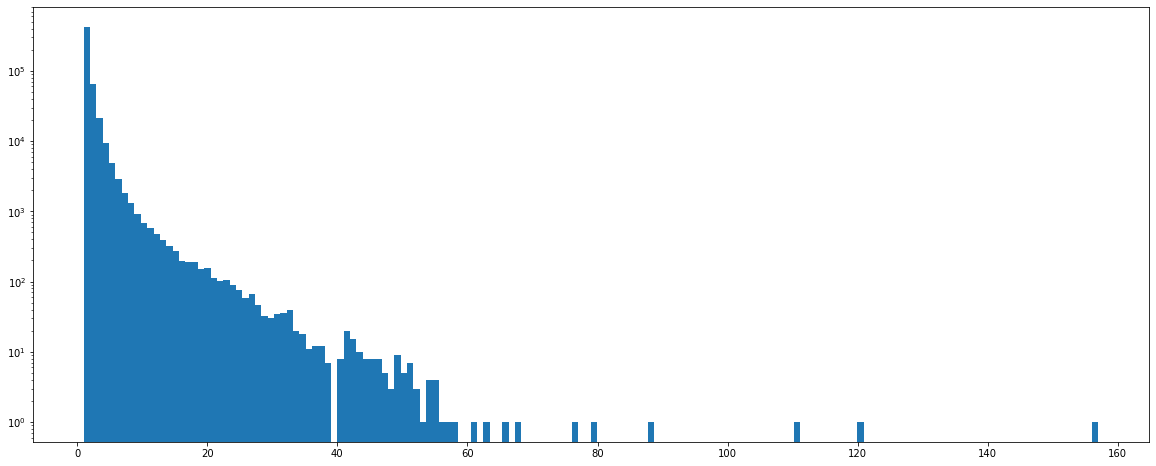

In [14]:
plt.figure(figsize=(20,8))
plt.hist(qid.value_counts(), bins=160)
plt.yscale("log")

In [15]:
new_df = df.sample(50000)

In [16]:
new_df

,id,qid1,qid2,question1,question2,is_duplicate
80360,80360,136633,136634,Why do some people iron out their pubic hair t...,What's the Best hair straightening iron?,0
273268,273268,391709,391710,Which is the best junior college in hyderabad ...,Which are the best junior colleges in Hyderaba...,0
157017,157017,245602,245603,How can I get 10 CGPA in board exams?,What is the best way to get 10 CGPA in the ten...,1
143595,143595,227475,227476,Why doesn't Bastion work on Chrome anymore?,How do I land a permanent Sr. Level SAP positi...,0
189687,189687,288513,288514,If I were to make a bomb in science class woul...,If I were to make a physically identical clone...,0
...,...,...,...,...,...,...
320505,320505,11359,442811,How can I score good marks in GRE?,How do I get good score in GRE?,1
41684,41684,75225,75226,What do you think of the answers on Quora?,What do you think of Quora?,0
398807,398807,532048,532049,What is the best question and answer platform?,What is the best question and answer platform?...,1
113318,113318,185237,185238,Can I use my wife's car to drive for Uber if t...,Can I add my wife's car to my Uber account?,1


In [17]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50000 entries, 80360 to 284995
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            50000 non-null  int64 
 1   qid1          50000 non-null  int64 
 2   qid2          50000 non-null  int64 
 3   question1     50000 non-null  object
 4   question2     50000 non-null  object
 5   is_duplicate  50000 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 2.7+ MB


In [18]:
new_df.isna().sum()

id              0
qid1            0
qid2            0
question1       0
question2       0
is_duplicate    0
dtype: int64

In [19]:
ques_df = new_df[["question1","question2"]]

In [20]:
ques_df

,question1,question2
80360,Why do some people iron out their pubic hair t...,What's the Best hair straightening iron?
273268,Which is the best junior college in hyderabad ...,Which are the best junior colleges in Hyderaba...
157017,How can I get 10 CGPA in board exams?,What is the best way to get 10 CGPA in the ten...
143595,Why doesn't Bastion work on Chrome anymore?,How do I land a permanent Sr. Level SAP positi...
189687,If I were to make a bomb in science class woul...,If I were to make a physically identical clone...
...,...,...
320505,How can I score good marks in GRE?,How do I get good score in GRE?
41684,What do you think of the answers on Quora?,What do you think of Quora?
398807,What is the best question and answer platform?,What is the best question and answer platform?...
113318,Can I use my wife's car to drive for Uber if t...,Can I add my wife's car to my Uber account?


In [21]:
questions = list(ques_df.question1) + list(ques_df.question2)

In [22]:
ques_df

,question1,question2
80360,Why do some people iron out their pubic hair t...,What's the Best hair straightening iron?
273268,Which is the best junior college in hyderabad ...,Which are the best junior colleges in Hyderaba...
157017,How can I get 10 CGPA in board exams?,What is the best way to get 10 CGPA in the ten...
143595,Why doesn't Bastion work on Chrome anymore?,How do I land a permanent Sr. Level SAP positi...
189687,If I were to make a bomb in science class woul...,If I were to make a physically identical clone...
...,...,...
320505,How can I score good marks in GRE?,How do I get good score in GRE?
41684,What do you think of the answers on Quora?,What do you think of Quora?
398807,What is the best question and answer platform?,What is the best question and answer platform?...
113318,Can I use my wife's car to drive for Uber if t...,Can I add my wife's car to my Uber account?


In [23]:
import re

In [24]:
from bs4 import BeautifulSoup

In [25]:
def preprocess(q):
    
    q = str(q).lower().strip()
    
    # Replace certain special characters with their string equivalents
    q = q.replace('%', ' percent')
    q = q.replace('$', ' dollar ')
    q = q.replace('₹', ' rupee ')
    q = q.replace('€', ' euro ')
    q = q.replace('@', ' at ')
    
    # The pattern '[math]' appears around 900 times in the whole dataset.
    q = q.replace('[math]', '')
    
    # Replacing some numbers with string equivalents (not perfect, can be done better to account for more cases)
    q = q.replace(',000,000,000 ', 'b ')
    q = q.replace(',000,000 ', 'm ')
    q = q.replace(',000 ', 'k ')
    q = re.sub(r'([0-9]+)000000000', r'\1b', q)
    q = re.sub(r'([0-9]+)000000', r'\1m', q)
    q = re.sub(r'([0-9]+)000', r'\1k', q)
    
    # Decontracting words
    # https://en.wikipedia.org/wiki/Wikipedia%3aList_of_English_contractions
    # https://stackoverflow.com/a/19794953
    contractions = { 
    "ain't": "am not",
    "aren't": "are not",
    "can't": "can not",
    "can't've": "can not have",
    "'cause": "because",
    "could've": "could have",
    "couldn't": "could not",
    "couldn't've": "could not have",
    "didn't": "did not",
    "doesn't": "does not",
    "don't": "do not",
    "hadn't": "had not",
    "hadn't've": "had not have",
    "hasn't": "has not",
    "haven't": "have not",
    "he'd": "he would",
    "he'd've": "he would have",
    "he'll": "he will",
    "he'll've": "he will have",
    "he's": "he is",
    "how'd": "how did",
    "how'd'y": "how do you",
    "how'll": "how will",
    "how's": "how is",
    "i'd": "i would",
    "i'd've": "i would have",
    "i'll": "i will",
    "i'll've": "i will have",
    "i'm": "i am",
    "i've": "i have",
    "isn't": "is not",
    "it'd": "it would",
    "it'd've": "it would have",
    "it'll": "it will",
    "it'll've": "it will have",
    "it's": "it is",
    "let's": "let us",
    "ma'am": "madam",
    "mayn't": "may not",
    "might've": "might have",
    "mightn't": "might not",
    "mightn't've": "might not have",
    "must've": "must have",
    "mustn't": "must not",
    "mustn't've": "must not have",
    "needn't": "need not",
    "needn't've": "need not have",
    "o'clock": "of the clock",
    "oughtn't": "ought not",
    "oughtn't've": "ought not have",
    "shan't": "shall not",
    "sha'n't": "shall not",
    "shan't've": "shall not have",
    "she'd": "she would",
    "she'd've": "she would have",
    "she'll": "she will",
    "she'll've": "she will have",
    "she's": "she is",
    "should've": "should have",
    "shouldn't": "should not",
    "shouldn't've": "should not have",
    "so've": "so have",
    "so's": "so as",
    "that'd": "that would",
    "that'd've": "that would have",
    "that's": "that is",
    "there'd": "there would",
    "there'd've": "there would have",
    "there's": "there is",
    "they'd": "they would",
    "they'd've": "they would have",
    "they'll": "they will",
    "they'll've": "they will have",
    "they're": "they are",
    "they've": "they have",
    "to've": "to have",
    "wasn't": "was not",
    "we'd": "we would",
    "we'd've": "we would have",
    "we'll": "we will",
    "we'll've": "we will have",
    "we're": "we are",
    "we've": "we have",
    "weren't": "were not",
    "what'll": "what will",
    "what'll've": "what will have",
    "what're": "what are",
    "what's": "what is",
    "what've": "what have",
    "when's": "when is",
    "when've": "when have",
    "where'd": "where did",
    "where's": "where is",
    "where've": "where have",
    "who'll": "who will",
    "who'll've": "who will have",
    "who's": "who is",
    "who've": "who have",
    "why's": "why is",
    "why've": "why have",
    "will've": "will have",
    "won't": "will not",
    "won't've": "will not have",
    "would've": "would have",
    "wouldn't": "would not",
    "wouldn't've": "would not have",
    "y'all": "you all",
    "y'all'd": "you all would",
    "y'all'd've": "you all would have",
    "y'all're": "you all are",
    "y'all've": "you all have",
    "you'd": "you would",
    "you'd've": "you would have",
    "you'll": "you will",
    "you'll've": "you will have",
    "you're": "you are",
    "you've": "you have"
    }

    q_decontracted = []

    for word in q.split():
        if word in contractions:
            word = contractions[word]

        q_decontracted.append(word)

    q = ' '.join(q_decontracted)
    q = q.replace("'ve", " have")
    q = q.replace("n't", " not")
    q = q.replace("'re", " are")
    q = q.replace("'ll", " will")
    
    # Removing HTML tags
    q = BeautifulSoup(q)
    q = q.get_text()
    
    # Remove punctuations
    pattern = re.compile('\W')
    q = re.sub(pattern, ' ', q).strip()

    
    return q

In [26]:
preprocess("I've already! wasn't <b>done</b>?")

'i have already  was not done'

In [27]:
ques_df["question1"] = ques_df["question1"].apply(preprocess)
ques_df["question2"] = ques_df["question2"].apply(preprocess)

C:\Users\Dell\anaconda3\lib\site-packages\bs4\__init__.py:311: UserWarning: "b'.'" looks like a filename, not markup. You should probably open this file and pass the filehandle into Beautiful Soup.
  warnings.warn(
C:\Users\Dell\AppData\Local\Temp\ipykernel_9772\1533746052.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ques_df["question1"] = ques_df["question1"].apply(preprocess)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9772\1533746052.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ques_df["ques

In [28]:
ques_df

,question1,question2
80360,why do some people iron out their pubic hair t...,what is the best hair straightening iron
273268,which is the best junior college in hyderabad ...,which are the best junior colleges in hyderaba...
157017,how can i get 10 cgpa in board exams,what is the best way to get 10 cgpa in the ten...
143595,why does not bastion work on chrome anymore,how do i land a permanent sr level sap positi...
189687,if i were to make a bomb in science class woul...,if i were to make a physically identical clone...
...,...,...
320505,how can i score good marks in gre,how do i get good score in gre
41684,what do you think of the answers on quora,what do you think of quora
398807,what is the best question and answer platform,what is the best question and answer platform ...
113318,can i use my wife s car to drive for uber if t...,can i add my wife s car to my uber account


In [29]:
new_df['question1'].str.len()

80360      68
273268     58
157017     37
143595     43
189687     66
         ... 
320505     34
41684      42
398807     46
113318     73
284995    106
Name: question1, Length: 50000, dtype: int64

In [30]:
new_df['q1_len'] = new_df['question1'].str.len() 
new_df['q2_len'] = new_df['question2'].str.len()

In [31]:
new_df

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len
80360,80360,136633,136634,Why do some people iron out their pubic hair t...,What's the Best hair straightening iron?,0,68,40
273268,273268,391709,391710,Which is the best junior college in hyderabad ...,Which are the best junior colleges in Hyderaba...,0,58,60
157017,157017,245602,245603,How can I get 10 CGPA in board exams?,What is the best way to get 10 CGPA in the ten...,1,37,61
143595,143595,227475,227476,Why doesn't Bastion work on Chrome anymore?,How do I land a permanent Sr. Level SAP positi...,0,43,68
189687,189687,288513,288514,If I were to make a bomb in science class woul...,If I were to make a physically identical clone...,0,66,148
...,...,...,...,...,...,...,...,...
320505,320505,11359,442811,How can I score good marks in GRE?,How do I get good score in GRE?,1,34,31
41684,41684,75225,75226,What do you think of the answers on Quora?,What do you think of Quora?,0,42,27
398807,398807,532048,532049,What is the best question and answer platform?,What is the best question and answer platform?...,1,46,51
113318,113318,185237,185238,Can I use my wife's car to drive for Uber if t...,Can I add my wife's car to my Uber account?,1,73,43


In [32]:
new_df["question1"].apply(lambda row: row.split(" "))

80360     [Why, do, some, people, iron, out, their, pubi...
273268    [Which, is, the, best, junior, college, in, hy...
157017      [How, can, I, get, 10, CGPA, in, board, exams?]
143595    [Why, doesn't, Bastion, work, on, Chrome, anym...
189687    [If, I, were, to, make, a, bomb, in, science, ...
                                ...                        
320505          [How, can, I, score, good, marks, in, GRE?]
41684     [What, do, you, think, of, the, answers, on, Q...
398807    [What, is, the, best, question, and, answer, p...
113318    [Can, I, use, my, wife's, car, to, drive, for,...
284995    [Banking:, What, are, the, procedures, to, tak...
Name: question1, Length: 50000, dtype: object

In [33]:
new_df['q1_num_words']=new_df["question1"].apply(lambda row: len(row.split(" ")))
new_df['q2_num_words']=new_df["question2"].apply(lambda row: len(row.split(" ")))

In [34]:
new_df

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words
80360,80360,136633,136634,Why do some people iron out their pubic hair t...,What's the Best hair straightening iron?,0,68,40,13,6
273268,273268,391709,391710,Which is the best junior college in hyderabad ...,Which are the best junior colleges in Hyderaba...,0,58,60,10,10
157017,157017,245602,245603,How can I get 10 CGPA in board exams?,What is the best way to get 10 CGPA in the ten...,1,37,61,9,14
143595,143595,227475,227476,Why doesn't Bastion work on Chrome anymore?,How do I land a permanent Sr. Level SAP positi...,0,43,68,7,13
189687,189687,288513,288514,If I were to make a bomb in science class woul...,If I were to make a physically identical clone...,0,66,148,16,28
...,...,...,...,...,...,...,...,...,...,...
320505,320505,11359,442811,How can I score good marks in GRE?,How do I get good score in GRE?,1,34,31,8,8
41684,41684,75225,75226,What do you think of the answers on Quora?,What do you think of Quora?,0,42,27,9,6
398807,398807,532048,532049,What is the best question and answer platform?,What is the best question and answer platform?...,1,46,51,8,9
113318,113318,185237,185238,Can I use my wife's car to drive for Uber if t...,Can I add my wife's car to my Uber account?,1,73,43,18,10


In [35]:
# Python program to demonstrate working
# of map.
 
# Return double of n
def addition(n):
    return n + n
 
# We double all numbers using map()
numbers = (1, 2, 3, 4)
result = map(addition, numbers)
print(list(result))

[2, 4, 6, 8]


#### Common words in question 

In [36]:
def common_words(row):
    w1 = set(map(lambda word: word.lower().strip(), row['question1'].split(" ")))
    w2 = set(map(lambda word: word.lower().strip(), row['question2'].split(" ")))    
    return len(w1 & w2)

In [37]:
new_df['word_common'] = new_df.apply(common_words, axis=1)

In [38]:
new_df

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,word_common
80360,80360,136633,136634,Why do some people iron out their pubic hair t...,What's the Best hair straightening iron?,0,68,40,13,6,1
273268,273268,391709,391710,Which is the best junior college in hyderabad ...,Which are the best junior colleges in Hyderaba...,0,58,60,10,10,7
157017,157017,245602,245603,How can I get 10 CGPA in board exams?,What is the best way to get 10 CGPA in the ten...,1,37,61,9,14,6
143595,143595,227475,227476,Why doesn't Bastion work on Chrome anymore?,How do I land a permanent Sr. Level SAP positi...,0,43,68,7,13,0
189687,189687,288513,288514,If I were to make a bomb in science class woul...,If I were to make a physically identical clone...,0,66,148,16,28,9
...,...,...,...,...,...,...,...,...,...,...,...
320505,320505,11359,442811,How can I score good marks in GRE?,How do I get good score in GRE?,1,34,31,8,8,6
41684,41684,75225,75226,What do you think of the answers on Quora?,What do you think of Quora?,0,42,27,9,6,6
398807,398807,532048,532049,What is the best question and answer platform?,What is the best question and answer platform?...,1,46,51,8,9,8
113318,113318,185237,185238,Can I use my wife's car to drive for Uber if t...,Can I add my wife's car to my Uber account?,1,73,43,18,10,7


In [39]:
def total_words(row):
    w1 = set(map(lambda word: word.lower().strip(), row['question1'].split(" ")))
    w2 = set(map(lambda word: word.lower().strip(), row['question2'].split(" ")))    
    return (len(w1) + len(w2))

In [40]:
new_df['word_total'] = new_df.apply(total_words, axis=1)

In [41]:
new_df['word_share'] = round(new_df['word_common']/new_df['word_total'],2)

In [42]:
new_df

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,word_common,word_total,word_share
80360,80360,136633,136634,Why do some people iron out their pubic hair t...,What's the Best hair straightening iron?,0,68,40,13,6,1,19,0.05
273268,273268,391709,391710,Which is the best junior college in hyderabad ...,Which are the best junior colleges in Hyderaba...,0,58,60,10,10,7,20,0.35
157017,157017,245602,245603,How can I get 10 CGPA in board exams?,What is the best way to get 10 CGPA in the ten...,1,37,61,9,14,6,22,0.27
143595,143595,227475,227476,Why doesn't Bastion work on Chrome anymore?,How do I land a permanent Sr. Level SAP positi...,0,43,68,7,13,0,20,0.00
189687,189687,288513,288514,If I were to make a bomb in science class woul...,If I were to make a physically identical clone...,0,66,148,16,28,9,39,0.23
...,...,...,...,...,...,...,...,...,...,...,...,...,...
320505,320505,11359,442811,How can I score good marks in GRE?,How do I get good score in GRE?,1,34,31,8,8,6,16,0.38
41684,41684,75225,75226,What do you think of the answers on Quora?,What do you think of Quora?,0,42,27,9,6,6,15,0.40
398807,398807,532048,532049,What is the best question and answer platform?,What is the best question and answer platform?...,1,46,51,8,9,8,17,0.47
113318,113318,185237,185238,Can I use my wife's car to drive for Uber if t...,Can I add my wife's car to my Uber account?,1,73,43,18,10,7,26,0.27


In [47]:
ques_df=new_df[["question1","question2"]]

In [48]:
ques_df

,question1,question2
80360,Why do some people iron out their pubic hair t...,What's the Best hair straightening iron?
273268,Which is the best junior college in hyderabad ...,Which are the best junior colleges in Hyderaba...
157017,How can I get 10 CGPA in board exams?,What is the best way to get 10 CGPA in the ten...
143595,Why doesn't Bastion work on Chrome anymore?,How do I land a permanent Sr. Level SAP positi...
189687,If I were to make a bomb in science class woul...,If I were to make a physically identical clone...
...,...,...
320505,How can I score good marks in GRE?,How do I get good score in GRE?
41684,What do you think of the answers on Quora?,What do you think of Quora?
398807,What is the best question and answer platform?,What is the best question and answer platform?...
113318,Can I use my wife's car to drive for Uber if t...,Can I add my wife's car to my Uber account?


In [ ]:
questions = list(ques_df['question1']) + list(ques_df['question2'])

In [86]:
questions

['Why do some people iron out their pubic hair to straighten them out?',
 'Which is the best junior college in hyderabad for finance?',
 'How can I get 10 CGPA in board exams?',
 "Why doesn't Bastion work on Chrome anymore?",
 'If I were to make a bomb in science class would I be sent to jail?',
 'Which are the best data analytics company in India?',
 'How will you deal with confused feelings?',
 'Tech Mahindra: I am a mechanical engineer and I have been placed in TM. Is there any chance that I can switch to a mechanical company after joining TM? How long does it take to get promoted in TM?',
 'How much equity should I give my first employee?',
 'What are the best AdvoCare products for weight loss?',
 'How would you define attraction?',
 "Why do we pay education CESS and senior and higher education CESS at McDonald's?",
 'Is Hillary Clinton still trustworthy based on her history of statements?',
 'Can alcohol be helpful for playing FPS games?',
 'How does your mind play tricks on you?'

In [87]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [106]:
tfidf = TfidfVectorizer()

In [108]:
tfidf.fit_transform(questions)

<100000x33662 sparse matrix of type '<class 'numpy.float64'>'
	with 1004895 stored elements in Compressed Sparse Row format>

In [110]:
tfidf.vocabulary_.items()

dict_items([('why', 32843), ('do', 9651), ('some', 28072), ('people', 22492), ('iron', 16017), ('out', 21719), ('their', 30085), ('pubic', 24134), ('hair', 13665), ('to', 30403), ('straighten', 28812), ('them', 30093), ('which', 32792), ('is', 16048), ('the', 30070), ('best', 4166), ('junior', 16573), ('college', 6859), ('in', 15201), ('hyderabad', 14740), ('for', 12178), ('finance', 11844), ('how', 14580), ('can', 5508), ('get', 12916), ('10', 32), ('cgpa', 6019), ('board', 4612), ('exams', 11146), ('doesn', 9679), ('bastion', 3869), ('work', 33044), ('on', 21420), ('chrome', 6394), ('anymore', 2633), ('if', 14947), ('were', 32730), ('make', 18494), ('bomb', 4680), ('science', 26688), ('class', 6557), ('would', 33094), ('be', 3944), ('sent', 26997), ('jail', 16209), ('are', 2850), ('data', 8416), ('analytics', 2395), ('company', 7034), ('india', 15314), ('will', 32885), ('you', 33371), ('deal', 8496), ('with', 32970), ('confused', 7276), ('feelings', 11683), ('tech', 29822), ('mahindr

In [112]:
word2weight = [(w, round(tfidf.idf_[i])) for w, i in tfidf.vocabulary_.items()]

In [115]:
word2weight = dict(word2weight)
word2weight

{'why': 3,
 'do': 3,
 'some': 4,
 'people': 4,
 'iron': 9,
 'out': 5,
 'their': 5,
 'pubic': 10,
 'hair': 7,
 'to': 2,
 'straighten': 11,
 'them': 6,
 'which': 4,
 'is': 2,
 'the': 2,
 'best': 3,
 'junior': 9,
 'college': 6,
 'in': 3,
 'hyderabad': 8,
 'for': 3,
 'finance': 8,
 'how': 2,
 'can': 3,
 'get': 4,
 '10': 6,
 'cgpa': 9,
 'board': 8,
 'exams': 7,
 'doesn': 7,
 'bastion': 12,
 'work': 5,
 'on': 4,
 'chrome': 9,
 'anymore': 8,
 'if': 4,
 'were': 6,
 'make': 5,
 'bomb': 9,
 'science': 6,
 'class': 7,
 'would': 5,
 'be': 4,
 'sent': 8,
 'jail': 9,
 'are': 3,
 'data': 6,
 'analytics': 8,
 'company': 6,
 'india': 4,
 'will': 4,
 'you': 3,
 'deal': 7,
 'with': 4,
 'confused': 9,
 'feelings': 8,
 'tech': 7,
 'mahindra': 10,
 'am': 5,
 'mechanical': 7,
 'engineer': 7,
 'and': 3,
 'have': 4,
 'been': 6,
 'placed': 9,
 'tm': 12,
 'there': 5,
 'any': 5,
 'chance': 7,
 'that': 4,
 'switch': 8,
 'after': 5,
 'joining': 9,
 'long': 6,
 'does': 4,
 'it': 4,
 'take': 6,
 'promoted': 10,
 'muc

## Introduction to Gensim
#### Gensim is a well-known open-source Python library used in NLP and Topic Modeling. Its ability to handle vast quantities of text data and its speed in training vector embeddings set it apart from the other NLP libraries. 

In [45]:
import gensim

In [49]:
questions = list(ques_df['question1']) + list(ques_df['question2'])

In [50]:
gensim.utils.simple_preprocess(questions[0])

['why',
 'do',
 'some',
 'people',
 'iron',
 'out',
 'their',
 'pubic',
 'hair',
 'to',
 'straighten',
 'them',
 'out']

In [52]:
ques_sent = []
for sentence in questions:
    ques_sent.append(gensim.utils.simple_preprocess(sentence))

In [69]:
model  = gensim.models.Word2Vec(window=5,min_count=3,sg=1,vector_size=100)

In [70]:
model.build_vocab(ques_sent)

In [78]:
model.train(corpus_iterable=ques_sent,total_examples= model.corpus_count, epochs=model.epochs)

(3656552, 5210070)

In [71]:
model.vector_size

100

In [74]:
model.wv.most_similar("public")

[('picking', 0.38922715187072754),
 ('crotch', 0.3817416727542877),
 ('drone', 0.36103472113609314),
 ('voters', 0.3585568070411682),
 ('intentions', 0.34866297245025635),
 ('mining', 0.33394306898117065),
 ('burnout', 0.3294789493083954),
 ('eastern', 0.32920515537261963),
 ('dharma', 0.3205453157424927),
 ('apparently', 0.31968626379966736)]

In [75]:
model.wv.most_similar("president")

[('embassy', 0.5006468892097473),
 ('snowden', 0.38916897773742676),
 ('satan', 0.3755105137825012),
 ('beginner', 0.36622950434684753),
 ('meth', 0.36016976833343506),
 ('cookies', 0.342513769865036),
 ('measures', 0.33639776706695557),
 ('novice', 0.31648483872413635),
 ('diseases', 0.3161391317844391),
 ('insead', 0.31530022621154785)]

In [96]:
model.wv.similar_by_word('pakistan',topn=15)

[('china', 0.8144738078117371),
 ('uri', 0.7969152927398682),
 ('attacks', 0.7938337326049805),
 ('bangladesh', 0.7792843580245972),
 ('afghanistan', 0.7760598659515381),
 ('russia', 0.7699243426322937),
 ('syria', 0.7688822150230408),
 ('iran', 0.765816867351532),
 ('attack', 0.7536165714263916),
 ('terrorist', 0.7515604496002197),
 ('declare', 0.7456188797950745),
 ('terror', 0.7444539666175842),
 ('unite', 0.7415289878845215),
 ('strikes', 0.7377384901046753),
 ('prostitution', 0.7315516471862793)]

In [66]:
model.wv.similarity("people","public")

0.038204387

In [77]:
model.wv["iron"]

array([ 0.00269939, -0.00603406,  0.00422301, -0.00674761,  0.00411718,
       -0.00349764,  0.0068256 , -0.00754699,  0.00654839, -0.00520292,
        0.0062552 , -0.00779059,  0.00913017, -0.00420272,  0.0034788 ,
        0.00893987,  0.00096012,  0.00974106,  0.00958963, -0.00819691,
       -0.00377053,  0.00690418, -0.00296213,  0.00972183,  0.00717835,
        0.00887932, -0.00210427, -0.00757451,  0.00259277,  0.00342929,
        0.00220425,  0.00415293, -0.00790684, -0.00513759,  0.00379486,
        0.00563153, -0.00442487,  0.00942496, -0.00272337,  0.00999928,
       -0.00841164,  0.00343224, -0.00364896, -0.00433309, -0.00244742,
        0.00228155, -0.00560698, -0.00085411,  0.00609525, -0.00711294,
       -0.00195454, -0.00214659, -0.00961131,  0.00116578, -0.00667675,
       -0.00568117, -0.00939973, -0.00907461, -0.00262942,  0.00586361,
       -0.00503627, -0.00878917, -0.00255741, -0.00391917, -0.0068966 ,
       -0.00642107,  0.00308181,  0.00190069,  0.00575494,  0.00

In [79]:
w2v = dict(zip(model.wv.index_to_key, (model.wv.vectors.round(3))))

In [82]:
w2v['pakistan']

array([-5.150e-01, -3.740e-01, -4.630e-01,  1.700e-02, -2.630e-01,
       -6.400e-01, -4.050e-01,  8.910e-01, -3.640e-01, -8.400e-01,
        1.170e-01, -4.600e-02,  7.600e-02, -1.800e-02, -3.000e-02,
       -2.910e-01,  3.110e-01, -1.390e-01,  6.770e-01, -5.860e-01,
       -3.630e-01,  2.300e-02,  1.940e-01,  1.090e-01,  1.460e-01,
        1.160e-01, -6.710e-01, -6.900e-02, -9.800e-02,  6.300e-02,
        3.570e-01, -5.000e-02,  6.600e-02, -1.052e+00, -1.400e-01,
        4.990e-01, -2.700e-01, -1.049e+00,  1.400e-01, -3.450e-01,
       -2.190e-01, -1.560e-01, -8.110e-01, -2.300e-01,  3.810e-01,
       -4.600e-01, -5.010e-01,  1.400e-02, -3.580e-01,  3.800e-01,
       -2.950e-01, -6.300e-02,  5.350e-01,  4.750e-01,  5.120e-01,
       -4.750e-01,  2.000e-01, -4.560e-01, -2.000e-02, -7.200e-02,
        8.700e-02, -3.730e-01, -1.640e-01, -6.900e-02, -1.930e-01,
       -1.460e-01,  5.400e-02,  1.600e-02, -8.140e-01,  4.210e-01,
        2.800e-02, -2.800e-02,  4.100e-01, -9.500e-02,  2.390e